# Ratings notebook
This notebook contains ratings for users. It should be noted that movie_metadata also has popularity ratings.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import EDA

EDA lib ready


In [3]:
ratings_small = pd.read_csv(r'..\data\the-movies-dataset\ratings_small.csv')
ratings = pd.read_csv(r'..\data\the-movies-dataset\ratings.csv')

# DF Ratings_small

In [4]:
EDA.general_info(ratings_small)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

(100004, 4)

-Presence of NaNs in df-
userId       False
movieId      False
rating       False
timestamp    False
dtype: bool


In [4]:
ratings_small['timestamp'] = ratings_small['timestamp'].apply(EDA.todatetime)
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14
1,1,1029,3.0,2009-12-14
2,1,1061,3.0,2009-12-14
3,1,1129,2.0,2009-12-14
4,1,1172,4.0,2009-12-14


In [5]:
ratings_small.columns = ['user_Id', 'movie_Id', 'rating', 'date']
ratings_small = ratings_small.set_index('date')
ratings_small.head()

,user_Id,movie_Id,rating,date
0,1,31,2.5,2009-12-14
1,1,1029,3.0,2009-12-14
2,1,1061,3.0,2009-12-14
3,1,1129,2.0,2009-12-14
4,1,1172,4.0,2009-12-14


In [5]:
ratings_small.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


# DF2 Ratings

In [8]:
EDA.general_info(ratings)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 794.2 MB
None

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

(26024289, 4)

-Presence of NaNs in df-
userId       False
movieId      False
rating       False
timestamp    False
dtype: bool


In [13]:
ratings.columns = ['user_Id', 'movie_Id', 'rating', 'date']
ratings['date'] = ratings['date'].apply(EDA.todatetime)
ratings = ratings.set_index('date')
ratings.head()

,user_Id,movie_Id,rating
date,,,
2015-03-09,1,110,1.0
2015-03-09,1,147,4.5
2015-03-09,1,858,5.0
2015-03-09,1,1221,5.0
2015-03-09,1,1246,5.0


In [14]:
ratings.describe()

,user_Id,movie_Id,rating
count,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00
std,7.817620e+04,3.108526e+04,1.065443e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,6.716400e+04,1.073000e+03,3.000000e+00
50%,1.351630e+05,2.583000e+03,3.500000e+00
75%,2.026930e+05,6.503000e+03,4.000000e+00
max,2.708960e+05,1.762750e+05,5.000000e+00


# Graphic displays

In [17]:
# Average movie rating
vc = ratings_small['rating'].value_counts()
vc_2 = ratings['rating'].value_counts()

print (f'Ratings small value counts:\n{vc}\n\nRatings value counts:\n{vc_2}')

Ratings small value counts:
4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

Ratings value counts:
4.0    6998802
3.0    5256722
5.0    3812499
3.5    3116213
4.5    2170441
2.0    1762440
2.5    1255358
1.0     843310
0.5     404897
1.5     403607
Name: rating, dtype: int64


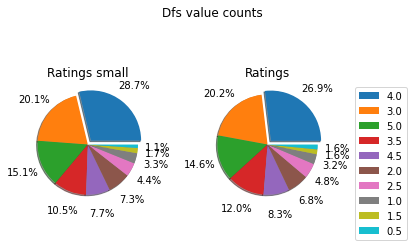

In [38]:
data1 = vc
data2 = vc_2

labels = vc.keys()
explode = 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# plot each pie chart in a separate subplot
ax1.pie(data1, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 1.4)
ax2.pie(data2, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 1.4)

# Legend and titles
plt.legend(labels, bbox_to_anchor=(1.4,1), loc= 'upper center')
plt.suptitle('Dfs value counts', fontsize=12)
ax1.set_title("Ratings small", loc='center', y=1)
ax2.set_title("Ratings", loc='center', y=1)

plt.tight_layout()
plt.show()

In [39]:
ratings_small = ratings_small.drop('user_Id', axis = 1)
ratings = ratings.drop('user_Id', axis = 1)

In [41]:
EDA.df_save(ratings_small)
EDA.df_save(ratings)